# Penguin Species Group Project
by : Shelby Jackson , Abigail Parolek, Puja Anand,Rachel Koo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib
from sklearn import datasets
from sklearn import svm
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap

# Group Contribution Statement

**Data Preparation**

*   Shelby Jackson

**Figures and Tables**


*   Shelby Jackson led Figure 1
*   Shelby Jackson led Figure 2
*   Shelby Jackson led Figure 3
*   Puja Anand led Figure 4
*   Rachel Koo led figure 5
*   Abigail Parolek led Figure 6
*   Shelby Jackson led Figure 7, 8, 9
*   Shelby Jackson led Feature Selection
* Abigail Parolek led Decision Tree figures


**Model and Analysis:**
* Rachel Koo and Puja Anand led the Logistic Regression Model
* Puja Anand led the Decision Tree Classifier
* Abigail Parolek implemented code to track top 5 combinations while scoring feature combinations for feature selection for Model 1
* Rachel Koo calculated test accuracy (score) and logistic test accuacy
* Rachel Koo led computing confusion matrix
* Rachel Koo led confusion matrix display
* Abigail Parolek led scoring feature combinations with test data
* Abigail Parolek led feature selection for Decision Tree Classifier, along with Rachel Koo
* Abigail Parolek implemented code to track top 5 combinations while scoring feature combinations for feature selection for Model 2



**Writing**
* Shelby Jackson wrote explanations for Figures 1-3 and 8-9
* Rachel Koo wrote explanation for figure 5
* Abigail Parolek wrote explaination for Figure 6
* Shelby Jackson wrote explanation for Feature Selection
* Shelby Jackson wrote intro to Logisitic Regression
* Puja Anand wrote explanation for Figure 4, 7 and 8
* Puja Anand wrote the intro to Decision Tree Classifier, and all the comments/docstrings in the ML section
* Puja Anand wrote the shortcomings of both models








# Data Import and Cleaning

In [ ]:
##Data import & cleaning

url = "https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv"
penguins = pd.read_csv(url)


#  Manual train-test split (80% train, 20% test)
np.random.seed(345)  # For reproducibility

# Split the data into train and test sets
train_penguins, test_penguins = train_test_split(penguins, test_size=0.2, random_state=345)

train_penguins = train_penguins.reset_index(drop=True)
test_penguins = test_penguins.reset_index(drop=True)




def clean_penguins(penguins):

    penguins = penguins[penguins['Sex']!= '.']

    penguins = penguins.dropna(subset=['Species', 'Culmen Length (mm)', 'Culmen Depth (mm)',
                        'Flipper Length (mm)', 'Body Mass (g)', 'Sex','Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'])

     # shorten species names
    #data["Species"] = data["Species"].str.split().str.get(0) #sure ill try and working on this
    penguins["Species"] = penguins["Species"].str.split().str.get(0) # :-)

    sex = preprocessing.LabelEncoder()
    island = preprocessing.LabelEncoder()
    species = preprocessing.LabelEncoder()

    penguins["numeric sex"]=sex.fit_transform(penguins["Sex"])  #purpose here is to have a more versatile df
    # if you would like to access the numeric value assigned to sex island or species you can now access the numeric column
    penguins["numeric island"]=island.fit_transform(penguins["Island"])
    penguins["numeric species"]=species.fit_transform(penguins["Species"])


    return penguins

train_clean = clean_penguins(train_penguins.copy())
test_clean = clean_penguins(test_penguins.copy())

penguins = clean_penguins(penguins) # lets clean our original data set too

print("Training set shape:", train_clean.shape)
print("Test set shape:", test_clean.shape)


#for ML purposes
def prep_penguin_data(df_data):
    df = df_data.copy()
    # drop any unused columns
    df = df.drop(columns=["studyName","Sample Number",
                          "Region","Stage","Individual ID",
                          "Individual ID","Clutch Completion","Date Egg","Comments"])


    X = df.drop(columns=["numeric species"],axis = 1)   # Predicting 'Species'
    y = df["numeric species"]

    return X, y

# apply to cleaned data
X_train, y_train = prep_penguin_data(train_clean)
X_test, y_test = prep_penguin_data(test_clean)



Training set shape: (259, 20)
Test set shape: (65, 20)


# Exploratory Analysis

In [ ]:
# some summary stats
def penguin_summary_table(group_cols,value_cols):
    c = list(set(group_cols).union(value_cols))
    df = penguins[c]
    #new_df = df.groupby(group_cols).mean()
    summary_df = df.groupby(group_cols)[value_cols].aggregate(['mean', 'std']).round(5)
    #standard deviation also seems worth stating!!!
    return summary_df


In [ ]:
penguin_summary_table(["Species"], ["Culmen Length (mm)", "Culmen Depth (mm)"])

Culmen Length (mm)          Culmen Depth (mm)         
                        mean      std              mean      std
Species                                                         
Adelie              38.78561  2.70195          18.32302  1.21996
Chinstrap           48.78806  3.34290          18.40448  1.13611
Gentoo              47.57034  3.11926          14.99407  0.98980

**Figure 1**
 This table provides summary statistics for each penguin species' mean culmen length and culmen depth. It allows us to see the differences in their averages, which helps us better determine how to categorize them by their features.


In [ ]:
penguin_summary_table(["Species",'Sex'],['Culmen Length (mm)','Culmen Depth (mm)']) # notable differences in length & depth based off gender

Culmen Length (mm)          Culmen Depth (mm)         
                               mean      std              mean      std
Species   Sex                                                          
Adelie    FEMALE           37.21268  2.00371          17.61972  0.95613
          MALE             40.42794  2.34157          19.05735  1.01926
Chinstrap FEMALE           46.57353  3.10867          17.58824  0.78113
          MALE             51.06970  1.58222          19.24545  0.77180
Gentoo    FEMALE           45.56379  2.05125          14.23793  0.54025
          MALE             49.51000  2.72867          15.72500  0.74530

**Figure 2**
This table groups penguins by species and sex, and then computes the mean once again for culmen length and depth. This is intended to highlight notable differences based on gender.

In [ ]:
penguin_summary_table(["Species",'Sex'],['Flipper Length (mm)']) # seems to be large diff in flipper length

Flipper Length (mm)         
                                mean      std
Species   Sex                                
Adelie    FEMALE           187.91549  5.62074
          MALE             192.83824  6.47062
Chinstrap FEMALE           191.73529  5.75410
          MALE             199.72727  5.97010
Gentoo    FEMALE           212.70690  3.89786
          MALE             221.53333  5.72081

**Figure 3**
This table explores the mean flipper length to see whether or not it is a notable feature. Although the averages are marginally different, the standard deviation may be problematic.

---



<ipython-input-65-2654913602>:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  penguins.groupby("Species").apply(plot_hist)


Text(0, 0.5, 'Count')

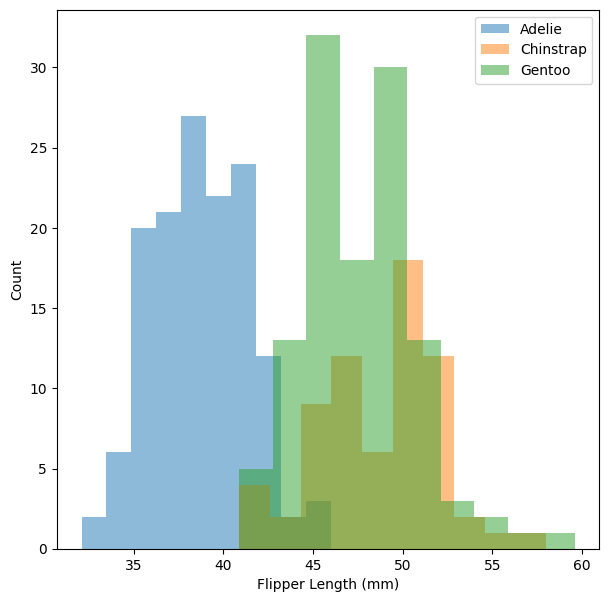

In [ ]:
#Figure 1: Histogram with flipper length plotted by species
fig, ax = plt.subplots(1,1, figsize = (7,7))

def plot_hist(df):
  ax.hist(df["Culmen Length (mm)"], alpha = 0.5, label = df["Species"])
penguins.groupby("Species").apply(plot_hist)
ax.legend()
ax.set_xlabel("Flipper Length (mm)")
ax.set_ylabel("Count")

**Figure 4**
This figure shows a histogram of culmen length (in mm) for penguins, grouped by species. A culmen is the top ridge of a bird’s beak, and its length can vary noticeably across species. The culmen length statistics vary significantly by the species, with the ___ species having much longer lengths than the rest of the species. Thus, this specific feature can be used to hone in on the species selection. Our models use this feature as well!

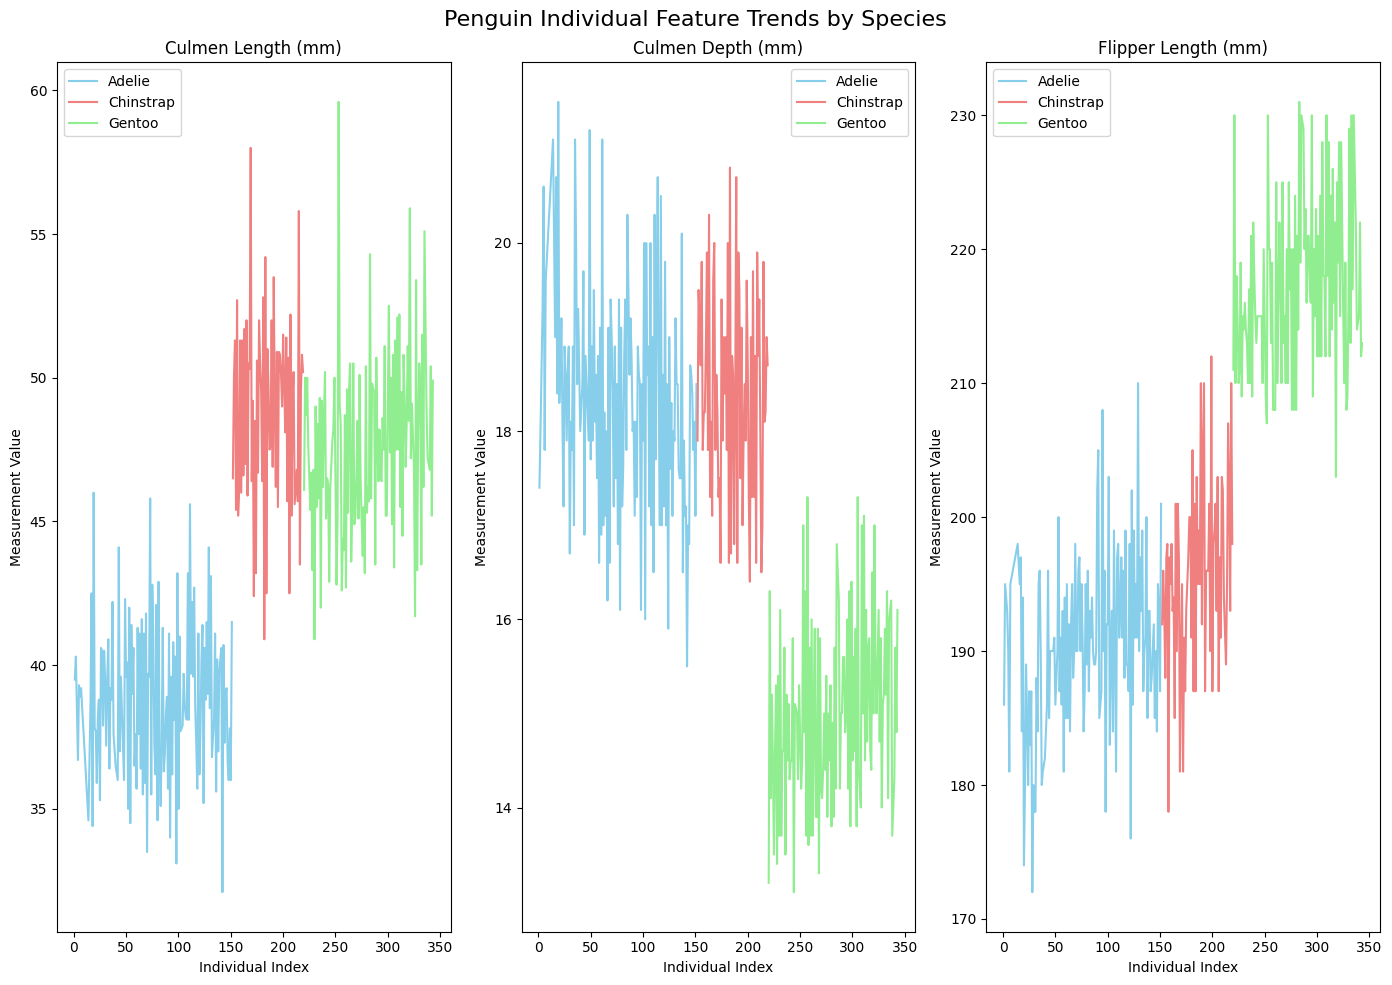

In [ ]:
#Figure 5:

penguins = penguins.dropna(subset=["Flipper Length (mm)", "Culmen Length (mm)", "Species"])
class PenguinLineGraph:
    def __init__(self, data):
        self.data = data.copy()

    def plot_individual_features(self):
        fig, axs = plt.subplots(1, 3, figsize=(14, 10), sharex=False)

        # Define color mapping per species
        species_colors = {"Adelie": "skyblue", "Chinstrap": "lightcoral", "Gentoo": "lightgreen"}

        # Plot individual data points with lines connecting them (not by time, just as index)
        for species, group in self.data.groupby("Species"):
            color = species_colors.get(species, "gray")
            axs[0].plot(group.index, group["Culmen Length (mm)"], label=species, color=color)
            axs[1].plot(group.index, group["Culmen Depth (mm)"], label=species, color=color)
            axs[2].plot(group.index, group["Flipper Length (mm)"], label=species, color=color)

        axs[0].set_title("Culmen Length (mm)")
        axs[1].set_title("Culmen Depth (mm)")
        axs[2].set_title("Flipper Length (mm)")
        for ax in axs.flat:
            ax.set_xlabel("Individual Index")
            ax.set_ylabel("Measurement Value")
            ax.legend()

        fig.suptitle("Penguin Individual Feature Trends by Species", fontsize=16)
        plt.tight_layout()
        plt.show()

# Create and plot
plotter = PenguinLineGraph(penguins)
plotter.plot_individual_features()

**Figure 5:** This figure shows how individual penguins vary across three physical characteristics: culmen length, culmen depth, flipper length. Each line represents a single penguin, with color corresponding to species. We can see that the three species follow distinct trends. Gentoo penguins (light green) tend to have consistently higher body mass and flipper length values, while Adelie (sky blue) and Chinstrap (light coral) are generally lower on those axes. The clear separation between species in certain traits(particularly flipper length) suggests that these features are highly informative for distinguishing between species. The overlapping but distinguishable patterns help us understand which traits contribute most to classification and variability across individuals.

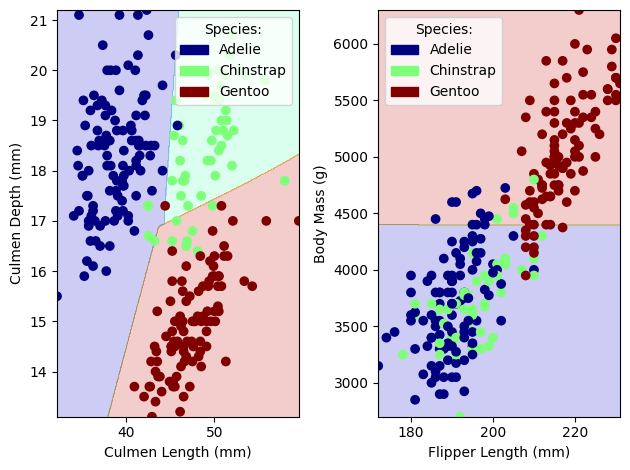

In [ ]:
import matplotlib.patches as mpatches

#Figure 6:
def plot_regions(c, c2, X, y):
  '''
  Plots decision regions for a classification models c and c2
  '''

  # shorten feature variable names used
  x0 = X['Culmen Length (mm)']
  x1 = X['Culmen Depth (mm)']
  x2 = X['Flipper Length (mm)']
  x3 = X['Body Mass (g)']

  # 2 grid creations
  grid_x1 = np.linspace(x0.min(), x0.max(), 501)
  grid_y1 = np.linspace(x1.min(), x1.max(), 501)
  xx1, yy1 = np.meshgrid(grid_x1, grid_y1)

  grid_x2 = np.linspace(x2.min(), x2.max(), 501)
  grid_y2 = np.linspace(x3.min(), x3.max(), 501)
  xx2, yy2 = np.meshgrid(grid_x2, grid_y2)

  # prepare the data to the format that is classifier-friendly
  # np.ravel() flattens xx1, xx2, yy1, and yy2 to 1D arrays
  # pd.DataFrame makes a 2D dataframe with 2 columns
  XX1 = xx1.ravel()
  YY1 = yy1.ravel()
  XY1 = pd.DataFrame({ "Culmen Length (mm)" : XX1, "Culmen Depth (mm)" : YY1})

  XX2 = xx2.ravel()
  YY2 = yy2.ravel()
  XY2 = pd.DataFrame({ "Flipper Length (mm)" : XX2, "Body Mass (g)" : YY2})

  p1 = c.predict(XY1)
  p2 = c2.predict(XY2)

  # add labels to use in the legends

  #turn the predictions p back to 2D
  p1 = p1.reshape(xx1.shape)
  p2 = p2.reshape(xx2.shape)

  # plot creation
  fig, ax = plt.subplots(1,2)

  ax[0].contourf(xx1, yy1, p1, cmap = "jet", alpha = 0.2, vmin = 0, vmax = 2)
  ax[0].scatter(x0, x1, c = y, cmap = "jet", vmin = 0, vmax = 2)
  ax[0].set(xlabel = "Culmen Length (mm)", ylabel = "Culmen Depth (mm)")
  #ax[0].legend()

  ax[1].contourf(xx2, yy2, p2, cmap = "jet", alpha = 0.2, vmin = 0, vmax = 2)
  ax[1].scatter(x2, x3, c = y, cmap = "jet", vmin = 0, vmax = 2)
  ax[1].set(xlabel = "Flipper Length (mm)", ylabel = "Body Mass (g)")

  # Create custom legend handles
  legend_handles = [
  mpatches.Patch(color=plt.cm.jet(0 / 2), label="Adelie"),
  mpatches.Patch(color=plt.cm.jet(1 / 2), label="Chinstrap"),
  mpatches.Patch(color=plt.cm.jet(2 / 2), label="Gentoo")
  ]

  # Add legends to each subplot
  ax[0].legend(handles=legend_handles, title="Species:")
  ax[1].legend(handles=legend_handles, title="Species:")

  plt.tight_layout()
  plt.show()


fig3_cols = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']

SVM = svm.SVC()
SVM.fit(X_train[['Culmen Length (mm)', 'Culmen Depth (mm)']], y_train)
SVM2 = svm.SVC()
SVM2.fit(X_train[['Flipper Length (mm)', 'Body Mass (g)']], y_train)
plot_regions(SVM, SVM2, X_train[fig3_cols], y_train)





**Figure 6**

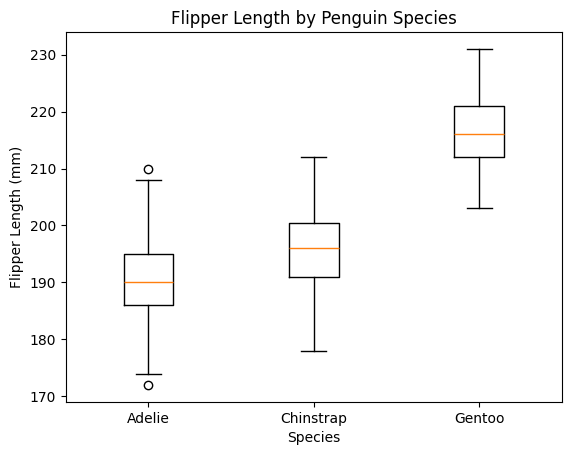

In [ ]:
 #visualizing this sig
# box plots for penguins
species_list = sorted(penguins['Species'].unique())


grouped_data = [penguins[penguins['Species'] == species]['Flipper Length (mm)'].values
                for species in species_list]

fig, ax = plt.subplots()
ax.boxplot(grouped_data, tick_labels=species_list)

ax.set_title('Flipper Length by Penguin Species')
ax.set_xlabel('Species')
ax.set_ylabel('Flipper Length (mm)')

plt.show() #large standard dev

**Figure 7**
The species vary a lot by the distribution of their flipper lengths. This diagram creates a boxplot for the species by flipper length. We can see that the Gentoo species has much longer flipper lengths on average, since their boxplot is much higher on the y-axis. This feature can be used to select which species of penguin it is, since there is a huge disparity here.

<ipython-input-69-2758839241>:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(grouped_data, labels=labels)


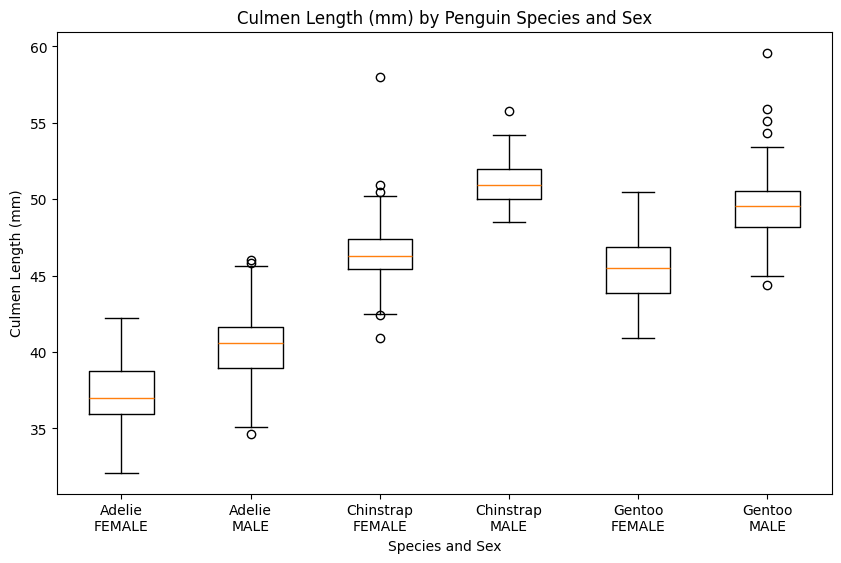

In [ ]:
species_list = sorted(penguins['Species'].unique())
sex_list = sorted(penguins['Sex'].unique())  # Make sure to drop NaNs

grouped_data = [] # to store inputs
labels = []

for species in species_list: #loop through species
    for sex in sex_list: # loop through their sex
        # make sure the sex and species match
        data = penguins[(penguins['Species'] == species) & (penguins['Sex'] == sex)]['Culmen Length (mm)'].values
        grouped_data.append(data) # add this to our data
        labels.append(f"{species}\n{sex}")

fig, ax = plt.subplots(figsize=(10, 6)) #plot
ax.boxplot(grouped_data, labels=labels)

ax.set_title('Culmen Length (mm) by Penguin Species and Sex')
ax.set_xlabel('Species and Sex')
ax.set_ylabel('Culmen Length (mm)')
plt.show()


**Figure 8** The species vary a lot by the distribution of their culmen lengths, and even more so by sex. This diagram creates a boxplot for the species by culmen length and by sex. We can see that the Chinstrap species has much longer flipper lengths on average, since their boxplot is much higher on the y-axis. On further analysis, the male Chinstrap penguins have even longer culmen lengths! Our models use culmen length and sex to find the relevant species, since we can easily detect a difference by this finer classification.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

#
vif_parameters = ['Culmen Length (mm)', 'Culmen Depth (mm)',
                'Flipper Length (mm)', 'Body Mass (g)',
                'numeric sex', 'numeric island']

X_vif = X_train[vif_parameters]

X_vif_const = add_constant(X_vif) #constant term

# we will create a vif data frame to store values
vif_df = pd.DataFrame()
vif_df['Feature'] = X_vif.columns
vif_df['VIF'] = [variance_inflation_factor(X_vif_const.values, i + 1)
                 for i in range(X_vif.shape[1])]

# Display VIFs
print("VIF for predictors of Species:")
print(vif_df.to_string(index=False))

print(X_vif[['Flipper Length (mm)', 'Body Mass (g)']].corr()) # highly correlated with each other
# high vif scores


VIF for predictors of Species:
            Feature      VIF
 Culmen Length (mm) 1.818785
  Culmen Depth (mm) 3.335780
Flipper Length (mm) 5.828612
      Body Mass (g) 5.691449
        numeric sex 2.658766
     numeric island 1.690688
                     Flipper Length (mm)  Body Mass (g)
Flipper Length (mm)             1.000000       0.871199
Body Mass (g)                   0.871199       1.000000


**Figure 9** This figure shows the variation inflation factor (VIF) for a variety of features. This allows us to determine which factors may be causing multicollinearity ,which may ultiamtely cause poor estimations of our predictors. For VIFs any value above 5 could be a potential issue, we highlight the presence of this collinearity by displaying the correlation between these two factors, which is far above .8. This analysis will further support our claims from the feature selection segment.

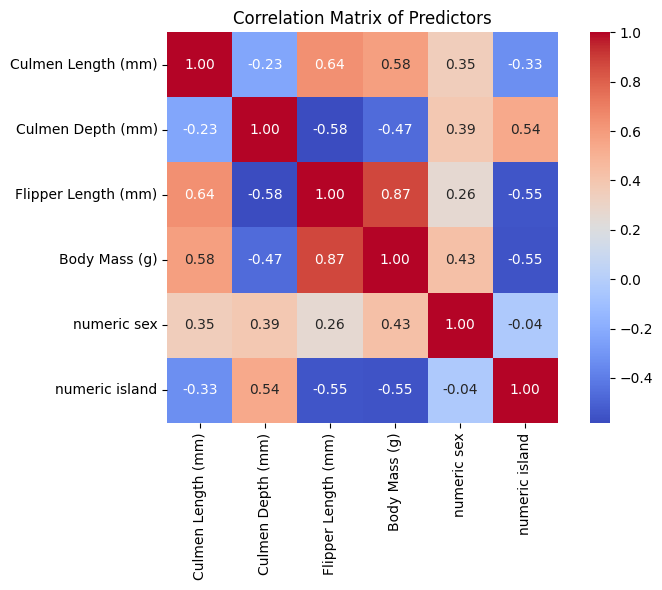

In [ ]:
# correlation matrix to visualize potentially multicolinearity amongst different potential predictors
corr_data = X_train[vif_parameters]

corr_matrix = corr_data.corr()

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix of Predictors")
plt.tight_layout()
plt.show()


**Figure 9** The correlation matrix above is intended to act as a visual aid in seeing multicollinearity patterns. As our Any values that are partiucarly red or blue may be highly collinear variables that can inflate variance and reduce interpretability. Note: for those unfamiliar with these sorts of matrices, the main diagonal can be diseregarded, as it is computing the correlation coefficient to the feature with respect to itself. This results in a score of 1, however, this provides no information for our purposes.

# **Feature Selection**:
  * Culmen Length (mm)
  * Culmen Depth (mm)
  * Sex

  Based on the automated feature selection below we obtained the highest cv score when our combination consisted of the categorical variable **Sex** and quantitative variables **Culmen Length (mm), and Culmen Depth (mm)**. This yieled a score of approximately 0.9806938159879337. This motivated our decision.

  However, this was not the only factor in our decision-making process. We also analyzed the numerous graphs, charts, and summary statistics in our exploratory analysis.
  
  As seen in both our table and box plot of Culmen Length (mm) by Penguin Species and Sex, there are notable differences in the length of the culmen amongst different species and sexes. The averages vary greatly from species to species, with a relatively small standard deviation, allowing us to potentially use this characteristic in predictions.

  The average flipper length, at first glance, seems to be a promising predictor. However, when analyzing it more closely, we see that the standard deviation is quite large, which could cause penguins to be incorrectly categorized. We also conducted a calculation of the Variance Inflation Factor (VIF) of potential predictors. We found that the Flipper length and body mass had large values, above 5, signaling potential multicollinearity and overestimation of the significance of these predictors (intuition derived from **STATS 101A**). This high correlation is apparent in the correlation matrix. Removing one of these seemed to be a good choice. Our CV scores from this predictor also support this decision.

  Intuitively, sex being a 1:1 ratio may not seem to be the most promising categorical predictor. However, it is important to consider that this qualitative feature, when coupled with quantitative features, can reveal crucial indicators for differentiating species.

# Intro to ML Model 1

 The logistic regression model belongs to a family of generalized linear models. It allows us to estimate the probability that a specific characteristic is present, or whether or not an event has occurred. In statistics, we coin the term the probability of  “success”, to denote this likelihood of such an occurrence. In terms of our model, it would represent the probability of determining the correct species of a given penguin.

Our algorithm is a supervised algorithm. Our model computes a linear combination of the given features and obtains a logit function, the log of the odds at a particular index i. Where i represents our current observation. This is likelihood is then passed to the Sigmoid Function where we determine whether or not the model predicts the occurrence. The model creates decision boundaries and dynamically outputs probabilities for inputs, allowing us to make predictions


In [ ]:
# Maybe logistic regression? We basically already have some of the code for this, in code section 10

In [ ]:
#Feature Selection for ML Model 1
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

def check_col_score(cols):
    """
    Trains and evaluates a logistic regression model via cross-validation
    on the columns in cols and returns the mean CV score.
    """
    print("Training with columns" +str(cols))
    LR = LogisticRegression(max_iter = 5000)
    return cross_val_score(LR, X_train[cols], y_train, cv=5).mean()

#all combinations of three
combos = [
    ['numeric sex', 'Culmen Length (mm)', 'Culmen Depth (mm)'],
    ['numeric sex', 'Culmen Length (mm)', 'Flipper Length (mm)'],
    ['numeric sex', 'Culmen Length (mm)', 'Body Mass (g)'],
    ['numeric sex', 'Culmen Length (mm)', 'Delta 15 N (o/oo)'],
    ['numeric sex', 'Culmen Length (mm)', 'Delta 13 C (o/oo)'],
    ['numeric sex', 'Culmen Depth (mm)', 'Flipper Length (mm)'],
    ['numeric sex', 'Culmen Depth (mm)', 'Body Mass (g)'],
    ['numeric sex', 'Culmen Depth (mm)', 'Delta 15 N (o/oo)'],
    ['numeric sex', 'Culmen Depth (mm)', 'Delta 13 C (o/oo)'],
    ['numeric sex', 'Flipper Length (mm)', 'Body Mass (g)'],
    ['numeric sex', 'Flipper Length (mm)', 'Delta 15 N (o/oo)'],
    ['numeric sex', 'Flipper Length (mm)', 'Delta 13 C (o/oo)'],
    ['numeric sex', 'Body Mass (g)', 'Delta 15 N (o/oo)'],
    ['numeric sex', 'Body Mass (g)', 'Delta 13 C (o/oo)'],
    ['numeric sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'],
    ['numeric island', 'Culmen Length (mm)', 'Culmen Depth (mm)'],
    ['numeric island', 'Culmen Length (mm)', 'Flipper Length (mm)'],
    ['numeric island', 'Culmen Length (mm)', 'Body Mass (g)'],
    ['numeric island', 'Culmen Length (mm)', 'Delta 15 N (o/oo)'],
    ['numeric island', 'Culmen Length (mm)', 'Delta 13 C (o/oo)'],
    ['numeric island', 'Culmen Depth (mm)', 'Flipper Length (mm)'],
    ['numeric island', 'Culmen Depth (mm)', 'Body Mass (g)'],
    ['numeric island', 'Culmen Depth (mm)', 'Delta 15 N (o/oo)'],
    ['numeric island', 'Culmen Depth (mm)', 'Delta 13 C (o/oo)'],
    ['numeric island', 'Flipper Length (mm)', 'Body Mass (g)'],
    ['numeric island', 'Flipper Length (mm)', 'Delta 15 N (o/oo)'],
    ['numeric island', 'Flipper Length (mm)', 'Delta 13 C (o/oo)'],
    ['numeric island', 'Body Mass (g)', 'Delta 15 N (o/oo)'],
    ['numeric island', 'Body Mass (g)', 'Delta 13 C (o/oo)'],
    ['numeric island', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']
]

# list of tuples to keep a record of the best combo : score
top_5_scores = []

# to keep track of top 5 combos
def update_top_5(combo, score):
    #add tuple
    top_5_scores.append((combo, score))

    #sort by score
    top_5_scores.sort(key=lambda x: x[1], reverse=True)

    #keep top 5
    if len(top_5_scores) > 5:
        top_5_scores.pop()

    return top_5_scores


# lets find the best score
for combo in combos:
    score = check_col_score(combo)
    print(" CV score is "+ str(score))
    update_top_5(combo, score)

#print top 5
print("Top 5 combos:")
for combo, score in top_5_scores:
    print(combo, score)

Training with columns['numeric sex', 'Culmen Length (mm)', 'Culmen Depth (mm)']
 CV score is 0.9806938159879337
Training with columns['numeric sex', 'Culmen Length (mm)', 'Flipper Length (mm)']
 CV score is 0.9613876319758672
Training with columns['numeric sex', 'Culmen Length (mm)', 'Body Mass (g)']
 CV score is 0.973076923076923
Training with columns['numeric sex', 'Culmen Length (mm)', 'Delta 15 N (o/oo)']
 CV score is 0.9653846153846153
Training with columns['numeric sex', 'Culmen Length (mm)', 'Delta 13 C (o/oo)']
 CV score is 0.969155354449472
Training with columns['numeric sex', 'Culmen Depth (mm)', 'Flipper Length (mm)']
 CV score is 0.8262443438914028
Training with columns['numeric sex', 'Culmen Depth (mm)', 'Body Mass (g)']
 CV score is 0.7992458521870287
Training with columns['numeric sex', 'Culmen Depth (mm)', 'Delta 15 N (o/oo)']
 CV score is 0.8532428355957767
Training with columns['numeric sex', 'Culmen Depth (mm)', 'Delta 13 C (o/oo)']
 CV score is 0.9381598793363499
Tr

In [ ]:
def test_col_score(cols):
  '''
  Using the predictor variables passed in, train the model and then evaluate it with the test data. Returns the score on the test set.
  '''
  #increasing the max iter parameter because our training set shape (259,20) is too large for the default?
  LR = LogisticRegression(max_iter=5000)
  LR.fit(X_train[cols], y_train)

  print("Testing with columns:"+ str(cols))

  return LR.score(X_test[cols], y_test)


# testing scores for our combos with the top 5 training scores
for combo in top_5_scores:
  score = test_col_score(combo[0])
  print("The test score is " + str(score))

Testing with columns:['numeric sex', 'Culmen Length (mm)', 'Culmen Depth (mm)']
The test score is 0.9846153846153847
Testing with columns:['numeric sex', 'Culmen Length (mm)', 'Body Mass (g)']
The test score is 0.9846153846153847
Testing with columns:['numeric island', 'Culmen Length (mm)', 'Body Mass (g)']
The test score is 0.9538461538461539
Testing with columns:['numeric island', 'Culmen Length (mm)', 'Culmen Depth (mm)']
The test score is 0.9692307692307692
Testing with columns:['numeric sex', 'Culmen Length (mm)', 'Delta 13 C (o/oo)']
The test score is 0.9692307692307692


In [ ]:
# Use the optimal feature combo found previously
# Perform cross-validation to choose the complexity parameter of model:
# Plot of the CV scores against complexity parameter, e.g. from Notebook 14G

[Text(0.5, 1.0, 'Best C: 1.2689610031679222'),
 Text(0.5, 0, 'C_val'),
 Text(0, 0.5, 'CV score')]

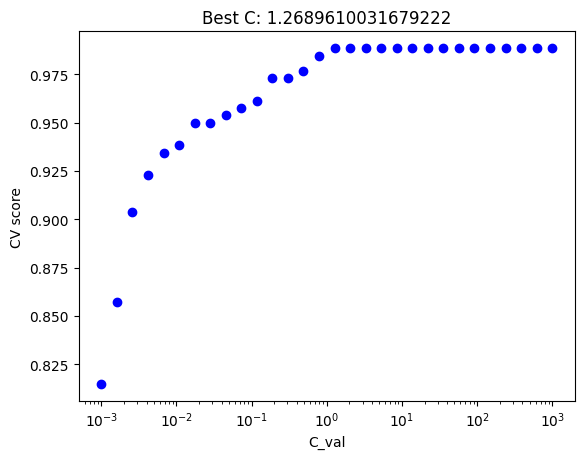

In [ ]:
from sklearn import tree

cols_to_use = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'numeric sex']
X_train_dt = X_train[cols_to_use]


fig, ax = plt.subplots(1)

best_score = 0
best_C = -3

for C_val in np.logspace(-3, 3, 30):
    model = LogisticRegression(C=C_val, max_iter=1000)
    score = cross_val_score(model, X_train_dt, y_train, cv=10).mean()
    ax.scatter(C_val, score, color = "blue")
    ax.set_xscale('log')  # Use log scale for x-axis

    if score > best_score:
        best_score = score
        best_C = C_val


ax.set(title = "Best C: " + str(best_C),
  xlabel = "C_val",
  ylabel = "CV score")

In [ ]:
# Fit model on training data using optimal complexity parameter & the
# selected optimal features
# Report score (accuracy)

In [ ]:
from sklearn import tree
from sklearn.metrics import accuracy_score

final_features = ['numeric sex', 'Culmen Length (mm)', 'Culmen Depth (mm)']

X_train_final = X_train[final_features]
X_test_final = X_test[final_features]

log_model = LogisticRegression(C=best_C, max_iter=1000)
log_model.fit(X_train_final, y_train)

y_pred = log_model.predict(X_test_final)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9846153846153847


In [ ]:
# Evaluate performance of the model using unseen test data, report:
# Score/accuracy on test data
# Confusion matrix plot of test data, e.g. Notebook 14I
# Create the decision region plot e.g. in project description page

In [ ]:

y_pred = log_model.predict(X_test_final)
acc_log = accuracy_score(y_test, y_pred)

print("Logistic Regression Test Accuracy:", acc_log)

Logistic Regression Test Accuracy: 0.9846153846153847


In [ ]:
from sklearn.metrics import confusion_matrix
# Compute Confusion Matrix (Raw and Normalized)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])
cm

array([[30,  0,  0],
       [ 1, 15,  0],
       [ 0,  0, 19]])

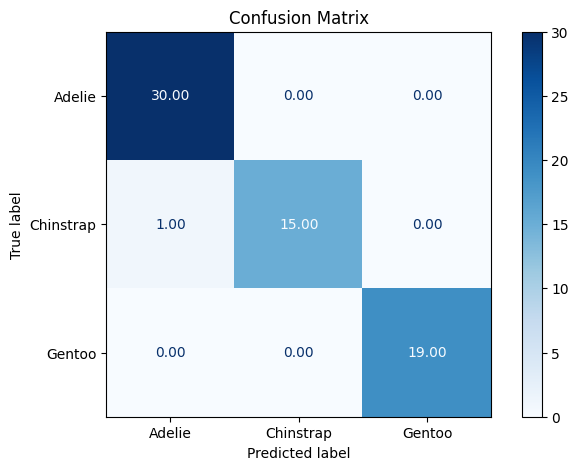

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(1, 1, figsize=(8, 5))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, \
                              display_labels = ['Adelie', 'Chinstrap', 'Gentoo'])

disp.plot(ax=ax, cmap='Blues', values_format='0.2f')
ax.set_title("Confusion Matrix")

plt.show()

In [ ]:
#Create the decision region plot
#e.g. in project description page:

In [ ]:
import matplotlib.patches as mpatches

def plot_regions(c, X, y, sex_val=0):
    """
    Plot decision regions for a classifier `c` trained on three features:
    'numeric sex', 'Culmen Length (mm)', and 'Culmen Depth (mm)'.

    Parameters:
    - c: trained classification model
    - X: DataFrame with at least these three columns
    - y: Series of class labels
    - sex_val: value for 'numeric sex' (0 or 1)

    Displays a matplotlib plot of decision boundaries.
    """

    # Feature names and their training order
    feature_order = ['numeric sex', 'Culmen Length (mm)', 'Culmen Depth (mm)']
    f1, f2 = 'Culmen Length (mm)', 'Culmen Depth (mm)'


    x0 = X[f1]
    x1 = X[f2]
    grid_x = np.linspace(x0.min() - 1, x0.max() + 1, 501)
    grid_y = np.linspace(x1.min() - 1, x1.max() + 1, 501)
    xx, yy = np.meshgrid(grid_x, grid_y)

    # Create the prediction grid with correct feature order
    grid_df = pd.DataFrame({
        'Culmen Length (mm)': xx.ravel(),
        'Culmen Depth (mm)': yy.ravel(),
        'numeric sex': sex_val
    })[feature_order]  # Reorder columns!!!

    # gives shape and predicts
    p = c.predict(grid_df).reshape(xx.shape)

    #color map
    from matplotlib.colors import ListedColormap
    class_labels = c.classes_ if hasattr(c, "classes_") else np.unique(y)
    colors = ['lightcoral', 'lightgreen', 'lightskyblue']
    cmap = ListedColormap(colors[:len(class_labels)])


    fig, ax = plt.subplots()
    ax.contourf(xx, yy, p, cmap=cmap, alpha=0.3)

    # plot points by their respective sexes
    mask = X['numeric sex'] == sex_val
    scatter = ax.scatter(x0[mask], x1[mask],
                         c=y[mask].map({label: i for i, label in enumerate(class_labels)}),
                         cmap=cmap, edgecolor='k', s=30)

    ax.set_xlabel(f1)
    ax.set_ylabel(f2)
    ax.set_title(f"Decision Regions (Sex = {sex_val})")


    # Create custom legend handles
    legend_handles = [
    mpatches.Patch(color=plt.cm.jet(0 / 2), label="Adelie"),
    mpatches.Patch(color=plt.cm.jet(1 / 2), label="Chinstrap"),
    mpatches.Patch(color=plt.cm.jet(2 / 2), label="Gentoo")
    ]

    # Add legends to each subplot
    ax.legend(handles=legend_handles, title="Species:")


    plt.tight_layout()
    plt.show()

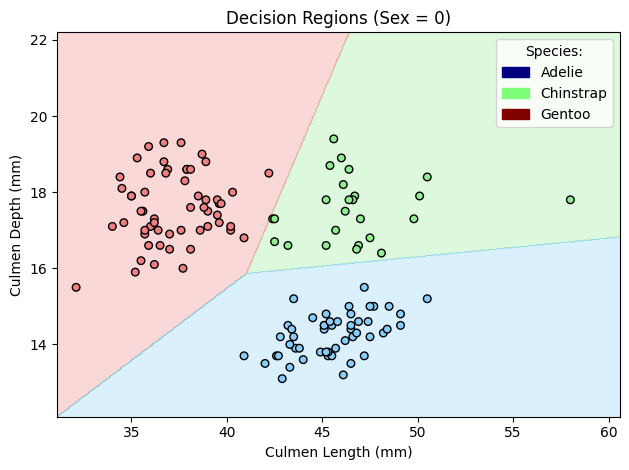

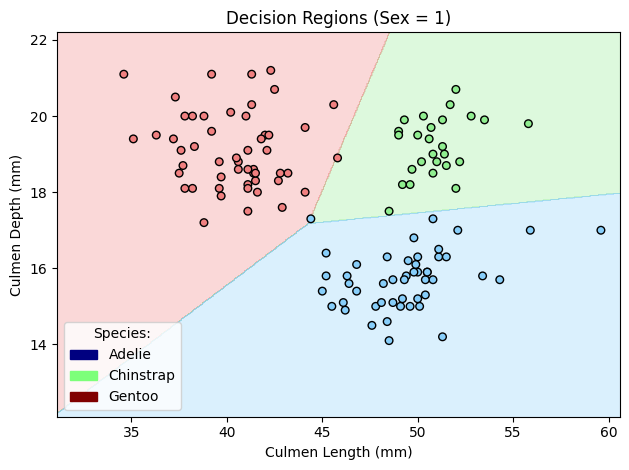

In [ ]:
# plot for females (==  0)
plot_regions(log_model, X_train_final, y_train, sex_val=0)

# plot for males (== 1)
plot_regions(log_model, X_train_final, y_train, sex_val=1)


The logistic regression model struggles primarily because it uses linear decision boundaries, which can’t fully capture the complex relationships between penguin species in the feature space. The decision region plots show smooth, straight boundaries that separate species based on culmen length and depth, but these boundaries fail in areas where species distributions overlap, especially between Adelie and Chinstrap penguins. Because their measurements are similar and not perfectly linearly separable, the model often misclassifies individuals near the edges of these regions. This limitation leads to errors visible in the confusion matrix and a lower test accuracy. Additionally, relying on only a few features restricts the model’s ability to find better separation, meaning it misses more nuanced patterns that could improve classification. Overall, the linear nature of logistic regression inherently limits its performance on this multi-class classification task with overlapping classes.

# Intro to ML Model 2



The Decision Tree Classifier is a machine learning model that makes predictions by asking a series of yes/no questions based on the features in the data. It behaves akin to  a flowchart or a game of "20 Questions" — the tree splits the data step by step to group similar examples together.

At each decision point (called a node), the model looks for the feature and threshold that best splits the training data into groups that are as “pure” as possible, which means that most of the data in each group belongs to the same class. It does this using a mathematical measure like Gini impurity or entropy to evaluate how good each possible split is.

The tree keeps growing by splitting the data into smaller and smaller groups, forming branches, until it reaches a stopping point, i.e. either when a maximum depth is reached, or when further splits don’t improve the model. The end points are called leaves, and each leaf makes a final prediction.

One of the strengths of decision trees is that they’re easy to understand and interpret. You can actually draw the whole decision process as a diagram. However, if a tree grows too deep, it can start memorizing the training data (which we have learnt as overfitting). Thus, we often limit its depth or use techniques like pruning or ensemble methods.

In [ ]:
# Maybe Decision Tree Classifier? We basically already have some of the code for this, which I pasted below


For the combo:['numeric sex', 'Culmen Length (mm)', 'Culmen Depth (mm)'] The score is 0.9459459459459459
For the combo:['numeric sex', 'Culmen Length (mm)', 'Flipper Length (mm)'] The score is 0.9652509652509652
For the combo:['numeric sex', 'Culmen Length (mm)', 'Body Mass (g)'] The score is 0.9343629343629344
For the combo:['numeric sex', 'Culmen Length (mm)', 'Delta 15 N (o/oo)'] The score is 0.9498069498069498
For the combo:['numeric sex', 'Culmen Length (mm)', 'Delta 13 C (o/oo)'] The score is 0.9536679536679536
For the combo:['numeric sex', 'Culmen Depth (mm)', 'Flipper Length (mm)'] The score is 0.8416988416988417
For the combo:['numeric sex', 'Culmen Depth (mm)', 'Body Mass (g)'] The score is 0.806949806949807
For the combo:['numeric sex', 'Culmen Depth (mm)', 'Delta 15 N (o/oo)'] The score is 0.8494208494208494
For the combo:['numeric sex', 'Culmen Depth (mm)', 'Delta 13 C (o/oo)'] The score is 0.9305019305019305
For the combo:['numeric sex', 'Flipper Length (mm)', 'Body Mass 

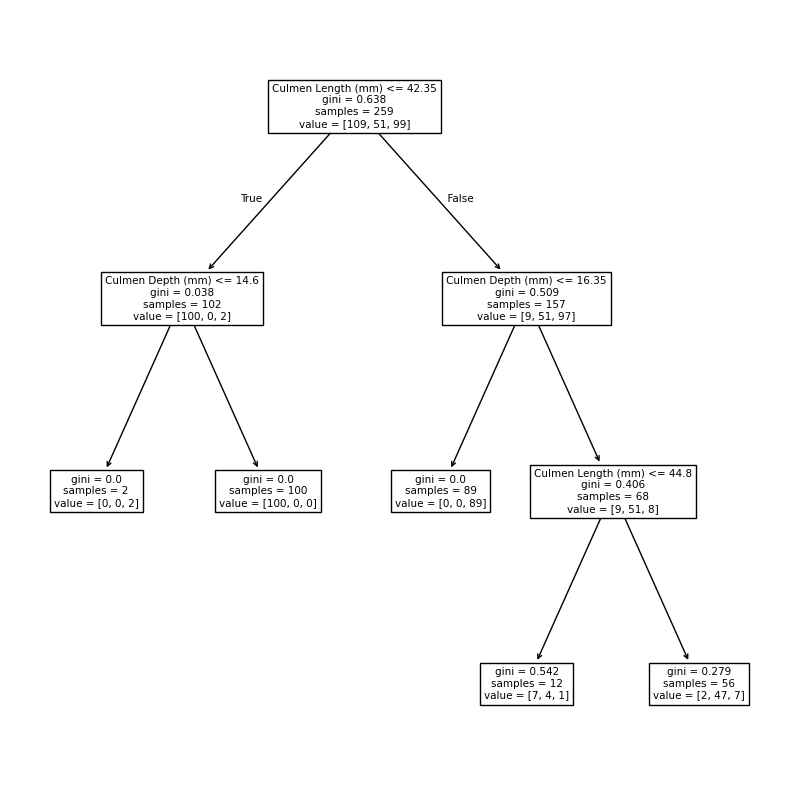

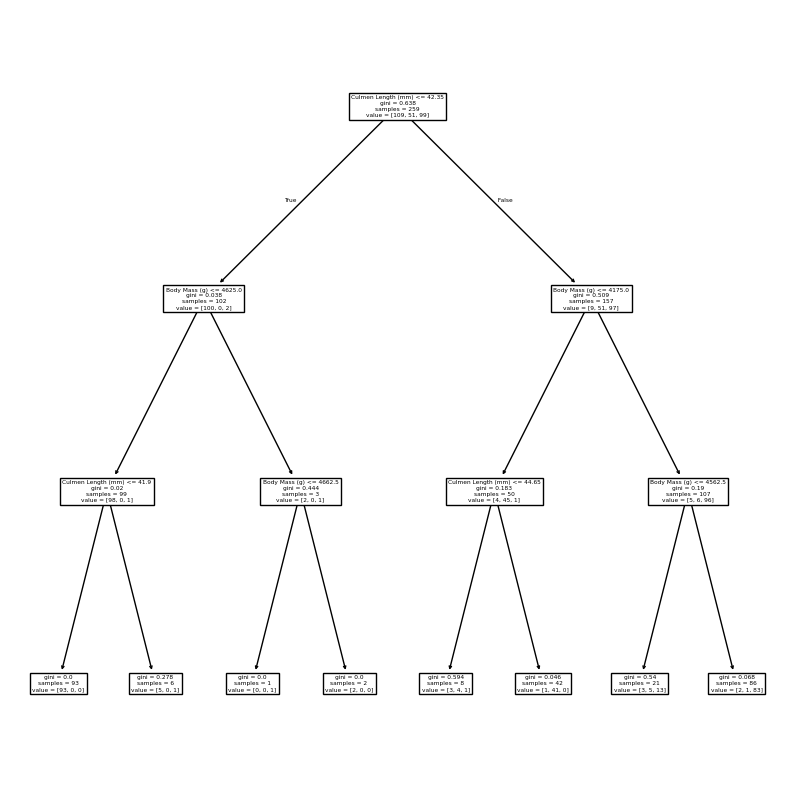

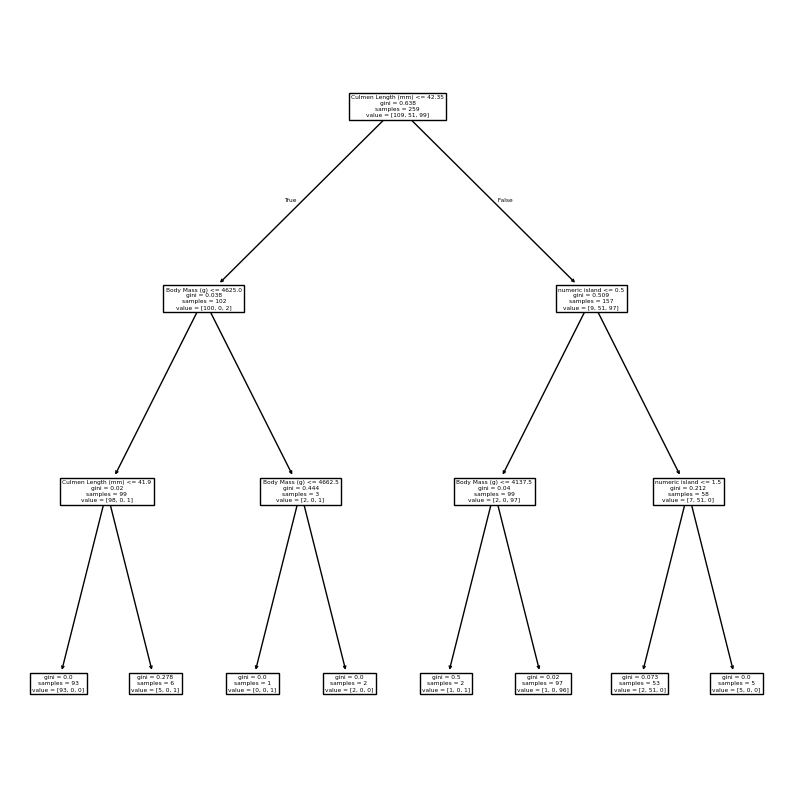

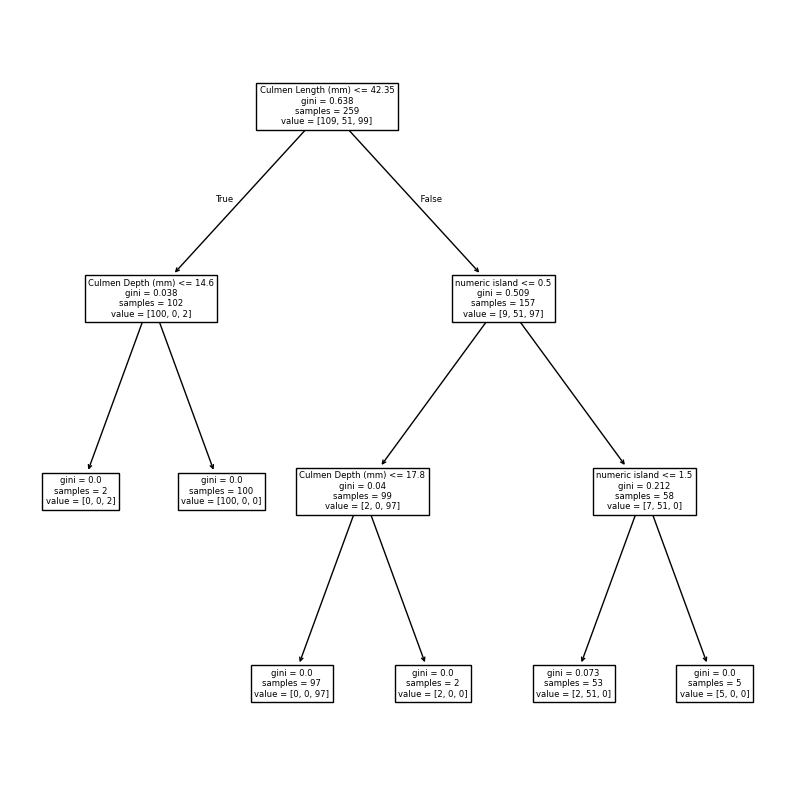

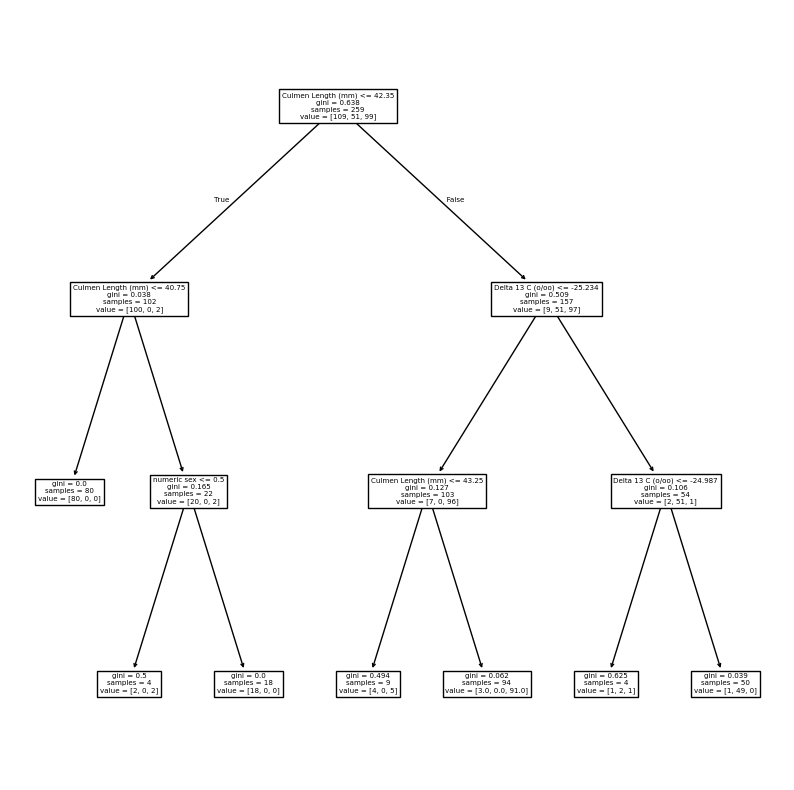

In [ ]:
#Feature Selection for ML Model 2
from sklearn.svm import SVC
from sklearn import tree


def ml_compatable(data):
  '''
  Making data machine learning compatable; most ML features cannot read strings.
  Inputs: data - pandas dataframe
  Outputs:
  '''
  recode = {
    "MALE" : "0",
    "FEMALE":"1",
  }
  data["Sex"] = data["Sex"].map(recode)

  return data


def myTree(x, y):
  '''
  Creates a decision tree classifier model and fits with passed in set of data x and y
  inputs: data sets x and y to train model
  outputs: returns score of model using training data
  '''
  T = tree.DecisionTreeClassifier(max_depth = 3)

  T.fit(x,y)

  scoreT = T.score(x,y)

  return scoreT

def printTree(X, y):
  '''
  Creates a decision tree classifier model and fits with passed in set of data x and y, then prints the decision tree
  inputs: data sets x and y to train model
  outputs: prints decision tree, no return value
  '''

  # creates decision tree classifier T
  T = tree.DecisionTreeClassifier(max_depth = 3)

  # fits T with the data X and y passed into function
  T.fit(X,y)

  # prints decision tree
  fig, ax = plt.subplots(1, figsize = (10,10))
  tree.plot_tree(T, feature_names=X.columns)


# list of tuples to keep a record of the best combo : score
top_5_scores_T = []

# to keep track of top 5 combos
def update_top_5_T(combo, score):
    '''
    Integrates another combo's score into the top 5 scores.
    Inputs: A new combo, score pair
    Outputs: The updated top 5 scores
    '''
    #add tuple
    top_5_scores_T.append((combo, score))

    #sort by score
    top_5_scores_T.sort(key=lambda x: x[1], reverse=True)

    #keep top 5
    if len(top_5_scores_T) > 5:
        top_5_scores_T.pop()

    return top_5_scores_T

# Evaluates scores of different feature combos
for combo in combos:
  score = myTree(X_train[combo], y_train)
  print("For the combo:" + str(combo), "The score is " + str(score))
  update_top_5_T(combo, score)


#print top 5 trees
print("Top 5 combos:")
for combo, score in top_5_scores:
    print(combo, score)
    printTree(X_train[combo], y_train)


In [ ]:
# Use the optimal feature combo found previously
# Perform cross-validation to choose the complexity parameter of model:
# Plot of the CV scores against complexity parameter, e.g. from Notebook 14G:

[Text(0.5, 1.0, 'Best depth: 22'),
 Text(0.5, 0, 'Depth'),
 Text(0, 0.5, 'CV score')]

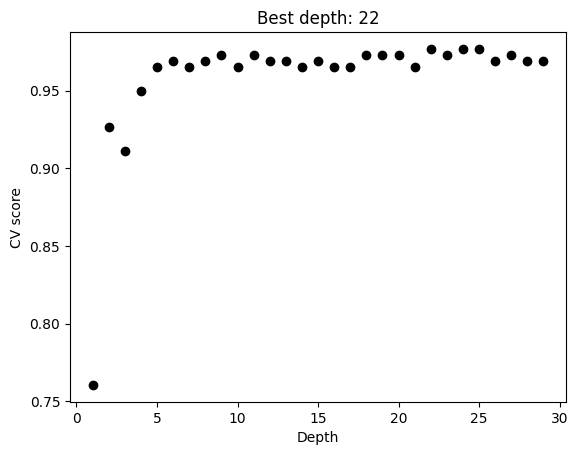

In [ ]:
from sklearn import tree

cols_to_use = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'numeric sex']
X_train_dt = X_train[cols_to_use]


fig, ax = plt.subplots(1)
best_score = 0
best_depth = 1

for d in range(1,30):
  T = tree.DecisionTreeClassifier(max_depth = d)
  cv_score = cross_val_score(T, X_train_dt, y_train, cv = 10).mean()
  ax.scatter(d, cv_score, color = "black")

  if cv_score > best_score:
    best_score = cv_score
    best_depth = d

ax.set(title = "Best depth: " + str(best_depth),
  xlabel = "Depth",
  ylabel = "CV score")

In [ ]:
# Fit model on training data using optimal complexity parameter & the
# selected optimal features
# Report score (accuracy)

In [ ]:
from sklearn import tree
from sklearn.metrics import accuracy_score

final_features = ['numeric sex', 'Culmen Length (mm)', 'Culmen Depth (mm)']

X_train_final = X_train[final_features]
X_test_final = X_test[final_features]

tree_model = tree.DecisionTreeClassifier(max_depth=best_depth)
tree_model.fit(X_train_final, y_train)

y_pred_tree = tree_model.predict(X_test_final)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9846153846153847


In [ ]:
# Evaluate performance of the model using unseen test data, report:
# Score/accuracy on test data
# Confusion matrix plot of test data, e.g. Notebook 14I
# Create the decision region plot e.g. in project description page

In [ ]:
from sklearn.metrics import confusion_matrix
# Compute Confusion Matrix (Raw and Normalized)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_tree, labels=[0, 1, 2])
cm


array([[29,  1,  0],
       [ 2, 14,  0],
       [ 1,  0, 18]])

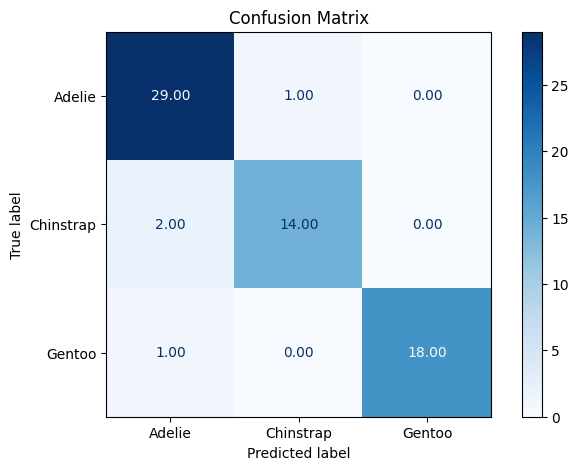

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(1, 1, figsize=(8, 5))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, \
                              display_labels = ['Adelie', 'Chinstrap', 'Gentoo'])

disp.plot(ax=ax, cmap='Blues', values_format='0.2f')
ax.set_title("Confusion Matrix")

plt.show()

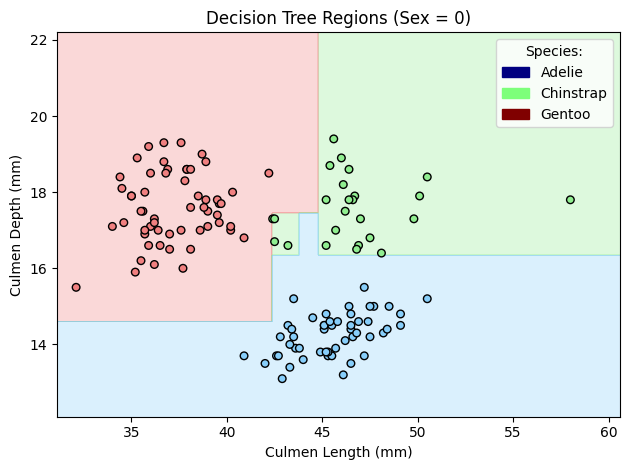

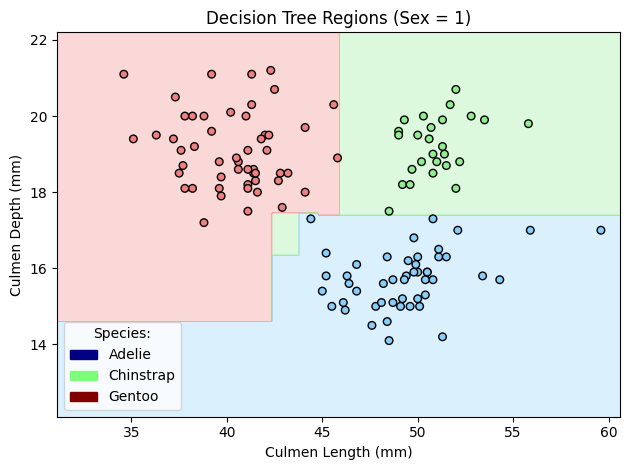

In [ ]:
import matplotlib.patches as mpatches

#Model 2 Decision Region Plots

def plot_regions_decision_tree(c, X, y, sex_val=0):
    """
    Plot decision regions for a DecisionTreeClassifier `c` trained on:
    ['numeric sex', 'Culmen Length (mm)', 'Culmen Depth (mm)']

    Parameters:
    - c: trained decision tree classifier
    - X: DataFrame with features
    - y: class labels
    - sex_val: 0 for male, 1 for female (held constant)

    Displays a 2D decision boundary plot.
    """


    feature_order = ['numeric sex', 'Culmen Length (mm)', 'Culmen Depth (mm)']
    f1, f2 = 'Culmen Length (mm)', 'Culmen Depth (mm)'

    # Grids
    x = X[f1]
    y_feat = X[f2]
    grid_x = np.linspace(x.min() - 1, x.max() + 1, 500)
    grid_y = np.linspace(y_feat.min() - 1, y_feat.max() + 1, 500)
    xx, yy = np.meshgrid(grid_x, grid_y)


    grid_df = pd.DataFrame({
        f1: xx.ravel(),
        f2: yy.ravel(),
        'numeric sex': sex_val
    })[feature_order]  # enforce correct order!

    # shaping
    Z = c.predict(grid_df).reshape(xx.shape)

    # create a color map
    class_labels = c.classes_ if hasattr(c, "classes_") else np.unique(y)
    colors = ['lightcoral', 'lightgreen', 'lightskyblue']
    cmap = ListedColormap(colors[:len(class_labels)])

    # plot these
    fig, ax = plt.subplots()
    ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    #input is by sex
    mask = X['numeric sex'] == sex_val
    ax.scatter(X.loc[mask, f1], X.loc[mask, f2],
               c=y[mask].map({label: i for i, label in enumerate(class_labels)}),
               cmap=cmap, edgecolor='k', s=30)

    ax.set_xlabel(f1)
    ax.set_ylabel(f2)
    ax.set_title(f"Decision Tree Regions (Sex = {sex_val})")

    # Create custom legend handles
    legend_handles = [
    mpatches.Patch(color=plt.cm.jet(0 / 2), label="Adelie"),
    mpatches.Patch(color=plt.cm.jet(1 / 2), label="Chinstrap"),
    mpatches.Patch(color=plt.cm.jet(2 / 2), label="Gentoo")
    ]

    # Add legends to each subplot
    ax.legend(handles=legend_handles, title="Species:")


    plt.tight_layout()
    plt.show()

# For male penguins (sex = 0)
plot_regions_decision_tree(tree_model, X_train, y_train, sex_val=0)

# For female penguins (sex = 1)
plot_regions_decision_tree(tree_model, X_train, y_train, sex_val=1)






The decision tree model achieves moderate test accuracy, but the confusion matrix reveals important patterns in its mistakes. Most notably, the model tends to confuse Adelie and Chinstrap penguins, likely because they have overlapping culmen lengths and depths, which are key features in the model. This confusion suggests that the tree struggles to draw clean boundaries between these species when the input features are similar. The model performs better at identifying Gentoo penguins, which tend to have more distinct measurements, resulting in fewer misclassifications. Overall, while the cross-validation score may be high at certain depths, the drop in test accuracy and the off-diagonal entries in the confusion matrix indicate that the model is overfitting to the training data and not generalizing well to unseen examples.

# **Discussion**

**Comparison of Models**

Between the two models, logistic regression achieved a higher accuracy score (around 0.98) on the test data compared to the decision tree (around 0.93). This superior performance is largely due to logistic regression’s ability to find a smooth, global linear boundary that generalizes well to unseen samples. By focusing on a regularized linear relationship between features—culmen length, culmen depth, and numeric sex—logistic regression avoids overfitting and captures the main trends that separate the penguin species.

These three features were carefully chosen because we obtained the highest CV score from this combination of features. Further, it pratically makes sense, as these three features provide the most relevant biological information for distinguishing species. Culmen length and depth directly relate to the penguin’s beak size, which varies noticeably across species, while the numeric sex variable accounts for sexual dimorphism, further refining the model’s classification ability. Including these features allows the model to leverage key biological differences without adding noise from less informative measurements.

In contrast, the decision tree model, while flexible and able to model nonlinear patterns, tended to overfit the training data at higher depths by creating overly complex, fragmented decision regions. This led to poorer generalization and lower test accuracy. Thus, we would say that logistic regression, combined with these biologically meaningful features, is a reliable choice for penguin species classification.

**Improving the Logistic Regression model**

The logistic regression model could be improved in several ways. First, incorporating more informative features—such as flipper length, body mass, or environmental variables—could help the model better capture subtle species differences. Second, applying feature engineering or transformations (like polynomial features or interaction terms) might allow the model to capture nonlinear relationships while remaining within the logistic regression framework.